In [85]:
# traveling salesman using simulated annealing


# generate random city locations
import numpy as np, matplotlib.pyplot as plt

def costFunction(old, new, temp):
    return np.exp((old  - new) / temp)

def distance(tour : dict):
    path = list(tour.values())
    distance = 0
    for start, stop in zip(path[::2], path[1::2]):
        distance += np.sqrt( ( (start - stop)**2 ).sum())
    return distance


In [118]:
N = 20
coolingRate = .01
temperatureThreshold = 1
temperature = 10000

cities = {idx : np.random.rand(2) * 100 for idx in range(N)}
shuffed = np.arange(N)
np.random.shuffle(shuffed)
tour = {jdx : cities[jdx] for jdx in \
        shuffed}

initialTour = {i: j  for i, j in tour.items()}
from copy import deepcopy
best = distance(initialTour)
while temperature > temperatureThreshold: 
    # swap two cities
    currentPlan = list(tour.keys())
    city1, city2 = np.random.choice(np.arange(N), 2)
    
    proposal = currentPlan[:]
    
#     print(city1, city2, len(proposal), len(currentPlan))
    
    proposal[city1] = currentPlan[city2]
    proposal[city2] = currentPlan[city1]
    proposalTour = {city : tour[city] for city in proposal}
    proposalDistance = distance(proposalTour)
    currentDistance = distance(tour)
    if costFunction(currentDistance, proposalDistance, temperature) > np.random.rand():
        tour = proposalTour
#         print('swapping')
    if proposalDistance < best:
        best = proposalDistance
    
    temperature *= 1 - coolingRate


    

/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


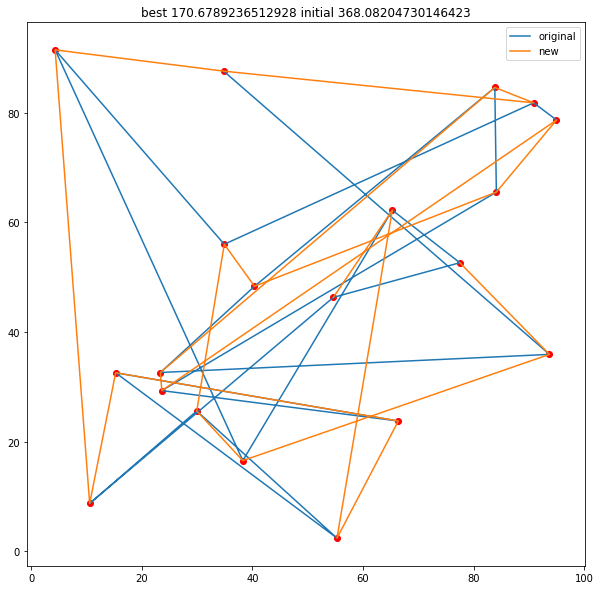

In [120]:
# for k1, k2 in zip(initialTour, tour):
#     print(k1 == k2)
fig, ax = plt.subplots(figsize = (10,10))
orig = np.asarray(list(initialTour.values()))
new  = np.asarray(list(tour.values()))
cityLocs = np.asarray(list(cities.values()))
ax.plot(*orig.T, label = 'original')
ax.plot(*new.T, label = 'new')
ax.scatter(*cityLocs.T, color = 'red')
ax.legend()
ax.set_title(f'best {best} initial {distance(initialTour)}')
fig.show()